### Model Building & Storing Weights

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K



# dimensions of our images.
img_width, img_height = 221, 221

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
test_data_dir = "data/test"
nb_train_samples = 1520
nb_validation_samples = 64
nb_test_samples = 160
epochs = 50
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(
    rescale=1. / 255
    )

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model.save_weights('generator_model_weights//first_try_150_rescaled_with_slice_included_221.h5')

D:\Softwares\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Found 1520 images belonging to 2 classes.
Found 64 images belonging to 2 classes.
Epoch 1/50
95/95 [==============================] - 127s 1s/step - loss: 0.6819 - acc: 0.7263 - val_loss: 0.6112 - val_acc: 0.7188
Epoch 2/50
95/95 [==============================] - 127s 1s/step - loss: 0.3136 - acc: 0.8868 - val_loss: 0.6175 - val_acc: 0.7188
Epoch 3/50
95/95 [==============================] - 128s 1s/step - loss: 0.2519 - acc: 0.9072 - val_loss: 1.0837 - val_acc: 0.7812
Epoch 4/50
95/95 [==============================] - 127s 1s/step - loss: 0.2028 - acc: 0.9105 - val_loss: 1.2005 - val_acc: 0.7188
Epoch 5/50
95/95 [==============================] - 128s 1s/step - loss: 0.1613 - acc: 0.9375 - val_loss: 1.3203 - val_acc: 0.7812
Epoch 6/50
95/95 [==============================] - 127s 1s/step - loss: 0.1840 - acc: 0.9263 - val_loss: 3.0960 - val_acc: 0.7188
Epoch 7/50
95/95 [==============================] - 128s 1s/step - loss: 0.1498 - acc: 0.9461 - val_loss: 1.5448 - val_acc: 0.7812
E

### Loading Stored Weights To Model

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import numpy as np
import tensorflow as tf


global graph,model
graph = tf.get_default_graph()

# dimensions of our images.
img_width, img_height = 221, 221

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
test_data_dir = "data/test"
nb_train_samples = 1520
nb_validation_samples = 64
nb_test_samples = 160
epochs = 50
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.load_weights('generator_model_weights//first_try_150_rescaled_with_set2_more_unloaded_included_221.h5')

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

D:\Softwares\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Image Prediction

In [2]:

from PIL import Image
from keras.preprocessing import image

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(221, 221))
    # convert PIL.Image.Image type to 3D tensor with shape (221, 221, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 221, 221, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def test_predict(imgPath):
    testImage = path_to_tensor(imgPath).astype('float32')
    with graph.as_default():
        imageClass = model.predict(testImage)
    return imageClass

imgLocation = "D:\\bi_portal\\screenshot_sanity_checker\\data_source\\sample_data\\spotfire_loading_0.png"
imageCategory = test_predict(imgLocation)
imageCategory

array([[1.]], dtype=float32)

In [404]:
import pandas
testReportsList = test_generator.filenames
testReportsClassification = []
for testReport in testReportsList:
    imgLocation = os.path.join("D:\\bi_portal\\screenshot_sanity_checker\\data\\test",testReport)
    imageCategory = test_predict(imgLocation)
    testReportsClassification.append(imageCategory[0][0])
testReportsClassFrame = pandas.DataFrame({"Reports_Name":testReportsList,"Original":test_generator.classes,"Predcition_Gen":np.round(testPredicts.flatten().tolist()),"Prediction_Class":np.round(testReportsClassification)})
testReportsClassFrame.to_csv("D:\\bi_portal\\screenshot_sanity_checker\\excels\\output_comparator.csv",index=False)

## Validation Accruacy Finder

In [20]:
validation_datagen = ImageDataGenerator(rescale=1. / 255)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False)

validation_generator.reset()
predicts = model.predict_generator(validation_generator,steps=nb_validation_samples // batch_size,verbose=1)

from sklearn.metrics import accuracy_score, f1_score
accuracy = accuracy_score(validation_generator.classes, np.round(predicts))
print("Accuracy: " + str(accuracy))

Found 64 images belonging to 2 classes.
4/4 [==============================] - 3s 788ms/step
Accuracy: 0.828125


## Test Accuracy Finder

In [21]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False)

#test_generator.reset()
testPredicts = model.predict_generator(test_generator,steps=nb_test_samples // batch_size,verbose=1)

from sklearn.metrics import accuracy_score, f1_score
accuracy = accuracy_score(test_generator.classes, np.round(testPredicts))
print("Accuracy: " + str(accuracy))

Found 160 images belonging to 2 classes.
10/10 [==============================] - 9s 909ms/step
Accuracy: 0.9375


## Visualizing Failed Prediction

In [8]:
%matplotlib inline 
import imageio
import matplotlib.pyplot as plt
import os,sys

baseImageDirectory = "D:\\bi_portal\\screenshot_sanity_checker\\data\\test"


images_test = [imageio.imread(os.path.join(baseImageDirectory,path)) for path in test_generator.filenames]
images_test = np.asarray(images_test)
images_test = images_test / 255
#maximum_square = np.ceil(np.sqrt(images.shape[0]))


In [9]:
len(images_test)

160

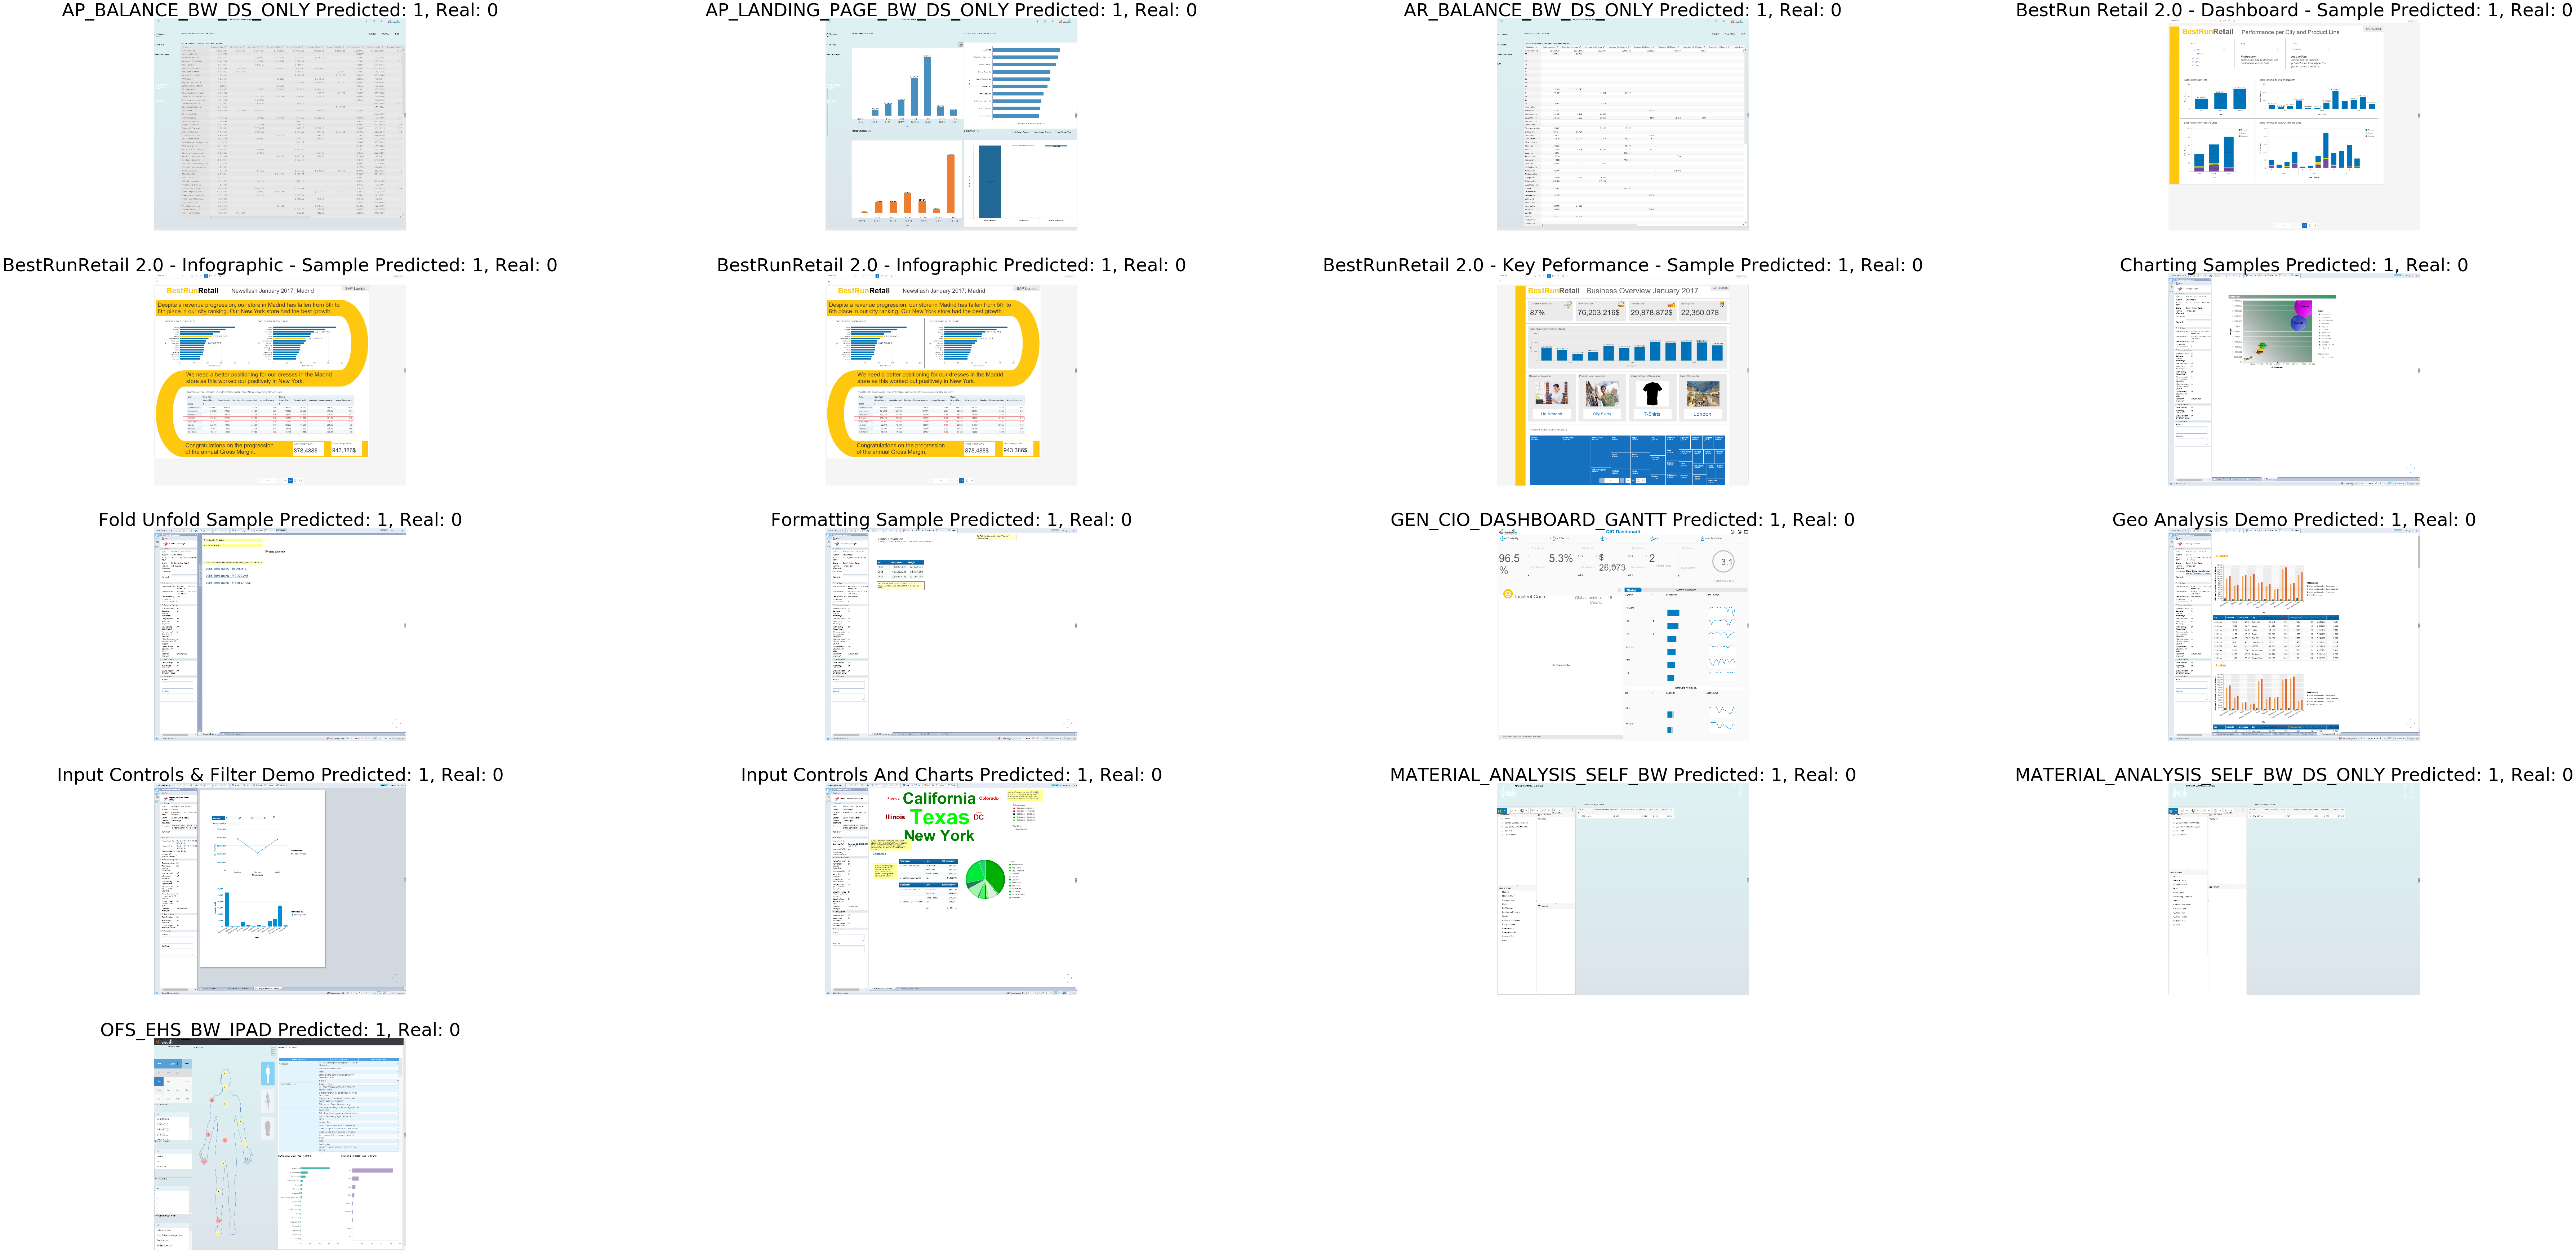

In [13]:
figure = plt.figure(figsize=(128,128))
count = 0
for file in test_generator.filenames[:39]:
    i = test_generator.filenames.index(file)
    #print(file.index(file))
    if (test_generator.classes[i] != np.round(testPredicts)[i])[0]:
        #print(str(file.split("\\")[-1][:-4]),test_generator.classes[i],np.round(testPredicts)[i])
        count+=1
        figure.add_subplot(10, 4, count)
        plt.imshow(images_test[i])
        plt.axis('off')
        plt.title( str(file.split("\\")[-1][:-4]) + " " + "Predicted: " + str(int(np.round(testPredicts)[i])) + ", Real: " + str(int(test_generator.classes[i])), fontsize=50)
    else:
        continue
plt.show()
    
    #print(file)